# US Accidents Data Visualization

This notebook analyzes the US Accidents dataset from Kaggle and creates visualizations that can be replicated in Tableau.

Dataset: [US Accidents (2016-2021)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

# Set visualization styles
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Display settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

## Load Processed Data

We'll load the data that was preprocessed by our preprocessing script.

In [ ]:
# Data paths
PROCESSED_DIR = Path("/Users/adityapatil/Desktop/US-Accidents-Visualization_Project/scripts/data/processed")

# Check if we have a sample or the full processed dataset
if (PROCESSED_DIR / "accidents_sample.csv").exists():
    df = pd.read_csv(PROCESSED_DIR / "accidents_sample.csv")
    print("Loaded sample dataset")
else:
    df = pd.read_csv(PROCESSED_DIR / "accidents_processed.csv")
    print("Loaded full processed dataset")

# Load aggregated datasets
state_data = pd.read_csv(PROCESSED_DIR / "state_data.csv")
time_data = pd.read_csv(PROCESSED_DIR / "time_data.csv")
hour_data = pd.read_csv(PROCESSED_DIR / "hour_data.csv")
weekday_data = pd.read_csv(PROCESSED_DIR / "weekday_data.csv")

# Load optional datasets if they exist
weather_data_path = PROCESSED_DIR / "weather_data.csv"
city_data_path = PROCESSED_DIR / "city_data.csv"

weather_data = pd.read_csv(weather_data_path) if weather_data_path.exists() else None
city_data = pd.read_csv(city_data_path) if city_data_path.exists() else None

# Convert timestamp columns back to datetime if needed
if 'Start_Time' in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'])
if 'End_Time' in df.columns:
    df['End_Time'] = pd.to_datetime(df['End_Time'])

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Start_Time'].min()} to {df['Start_Time'].max()}")
print(f"Number of states: {df['State'].nunique()}")

Loaded sample dataset
Dataset shape: (100000, 21)
Date range: 2016-02-09 07:54:44 to 2023-03-31 21:21:39
Number of states: 49


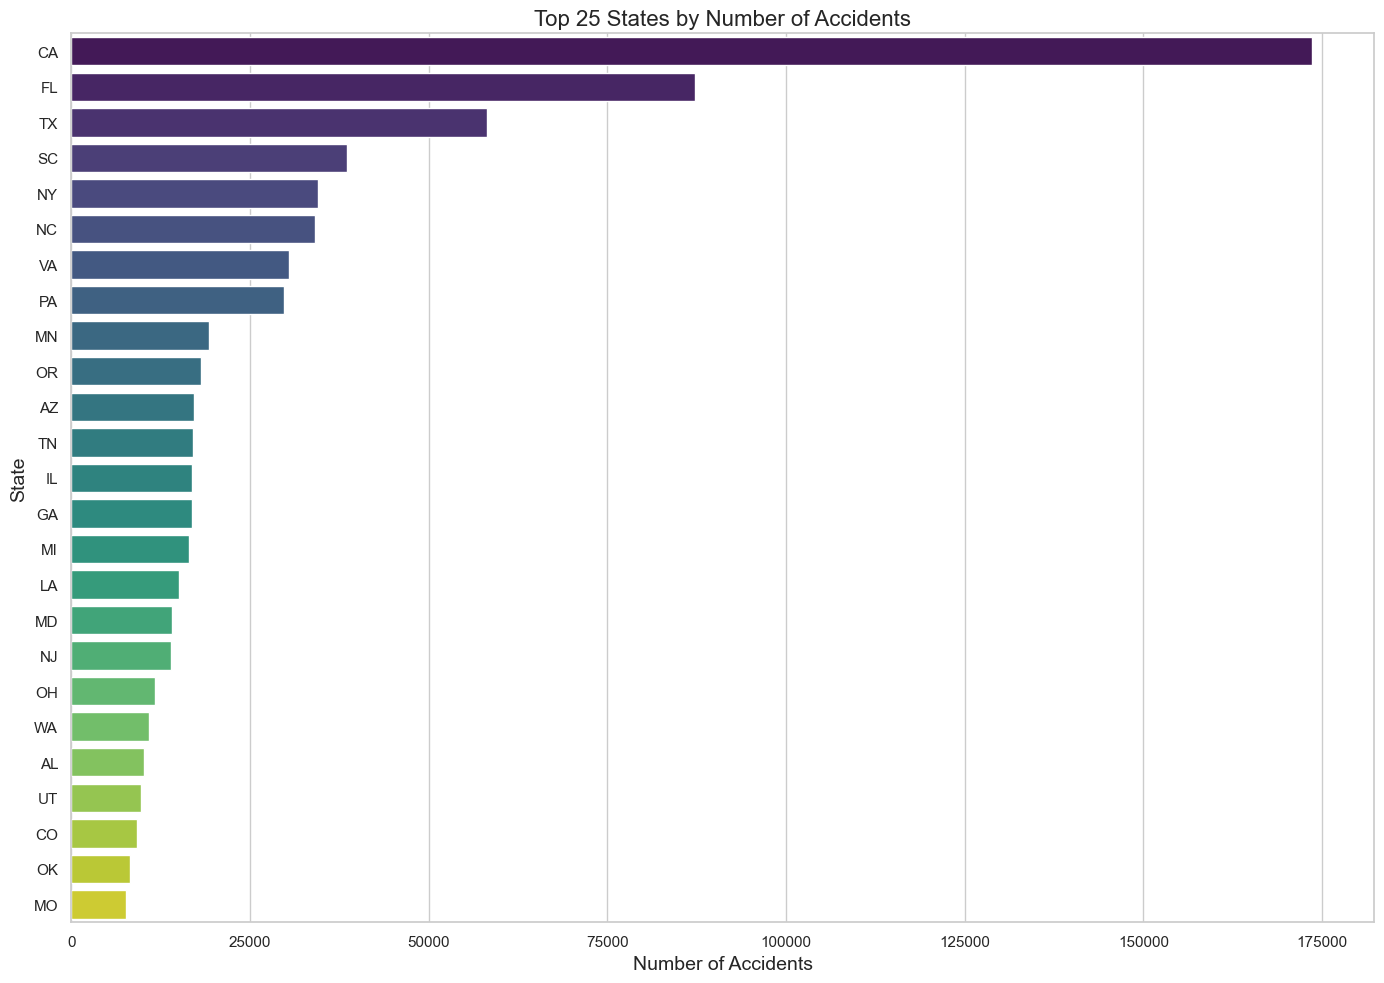

In [11]:
# Sort states by accident count for the bar chart
sorted_states = state_data.sort_values('Accident_Count', ascending=False)

# Create a bar chart of accidents by state
plt.figure(figsize=(14, 10))
sns.barplot(x='Accident_Count', y='State', data=sorted_states.head(25), palette='viridis')
plt.title('Top 25 States by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# Create a choropleth map using Plotly
fig = px.choropleth(
    state_data,
    locations='State',  # Spatial coordinates
    locationmode='USA-states',  # Location mode for US states
    color='Accident_Count',  # Color based on accident count
    scope='usa',  # Limit map to USA
    color_continuous_scale='Viridis',  # Color scale
    hover_data=['Avg_Severity'],  # Show severity in hover info
    title='US Accidents by State (2016-2021)'
)

fig.update_layout(
    title_font_size=20,
    geo=dict(
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()

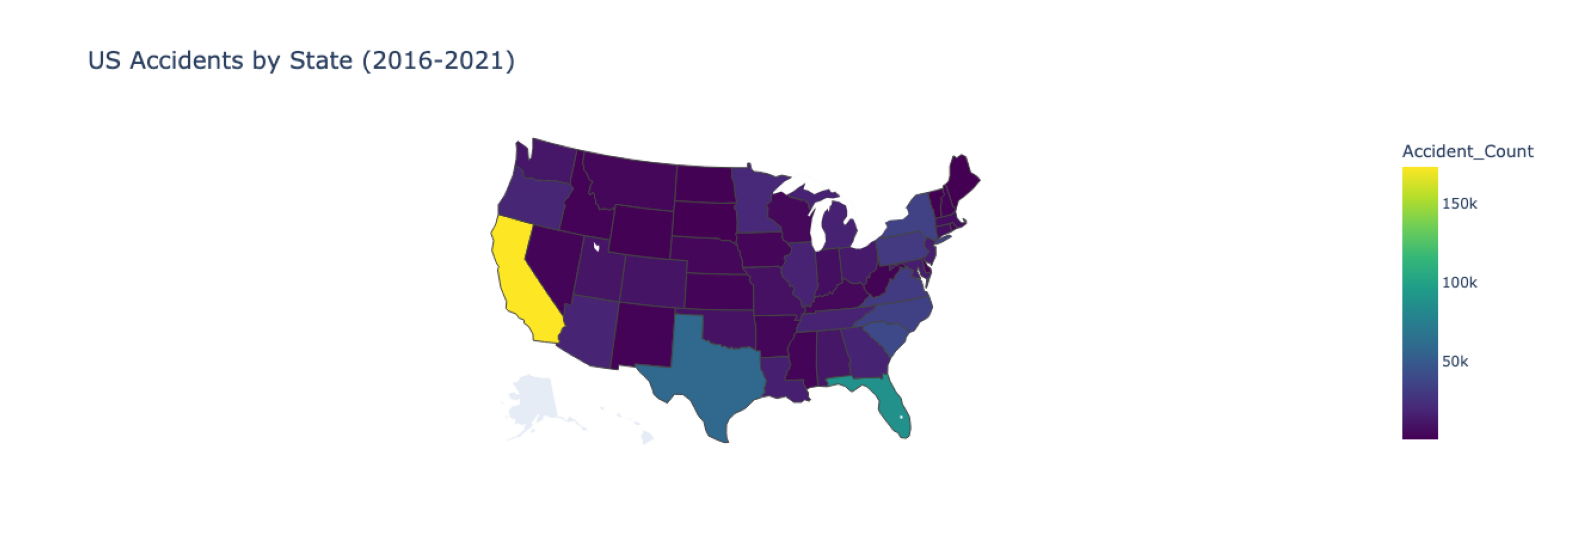

In [1]:
# Using this code to show the image of the plot created in the cell above (as the plot is not viewable on Github)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display an image
img = mpimg.imread("mapplot.png")
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


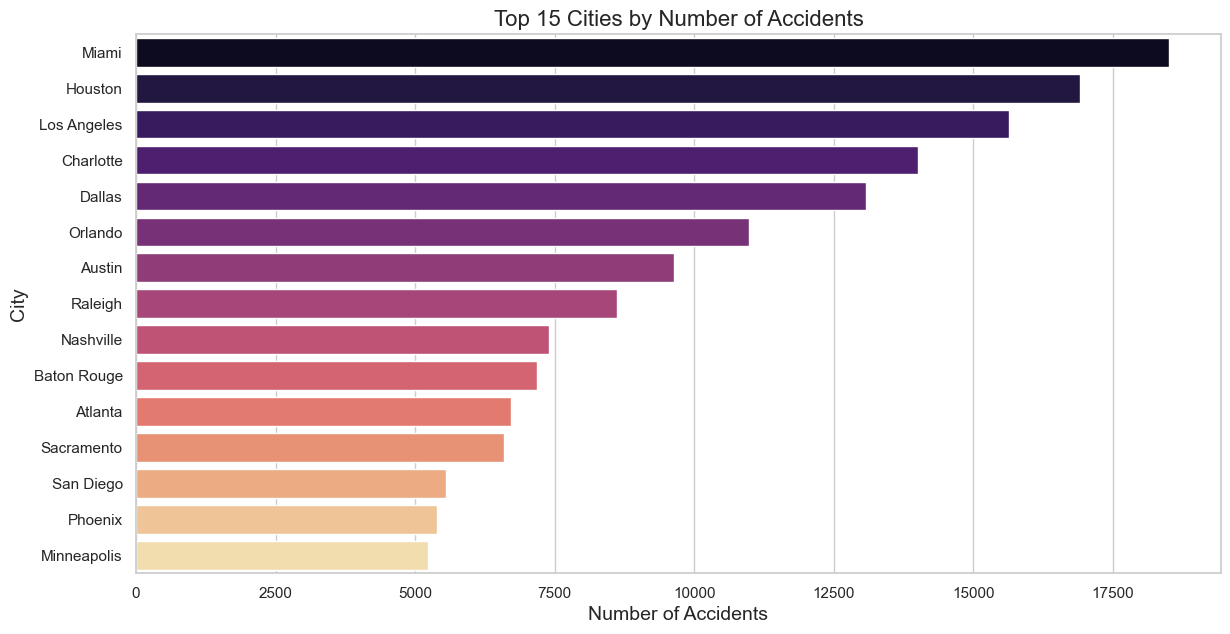

In [13]:
# Sorting data to get the top 15 cities with the highest accident counts
top_cities = city_data.sort_values(by="Accident_Count", ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x="Accident_Count", y="City", data=top_cities, palette="magma")

# Titles and labels
plt.title("Top 15 Cities by Number of Accidents", fontsize=16)
plt.xlabel("Number of Accidents", fontsize=14)
plt.ylabel("City", fontsize=14)

# Display the plot
plt.show()

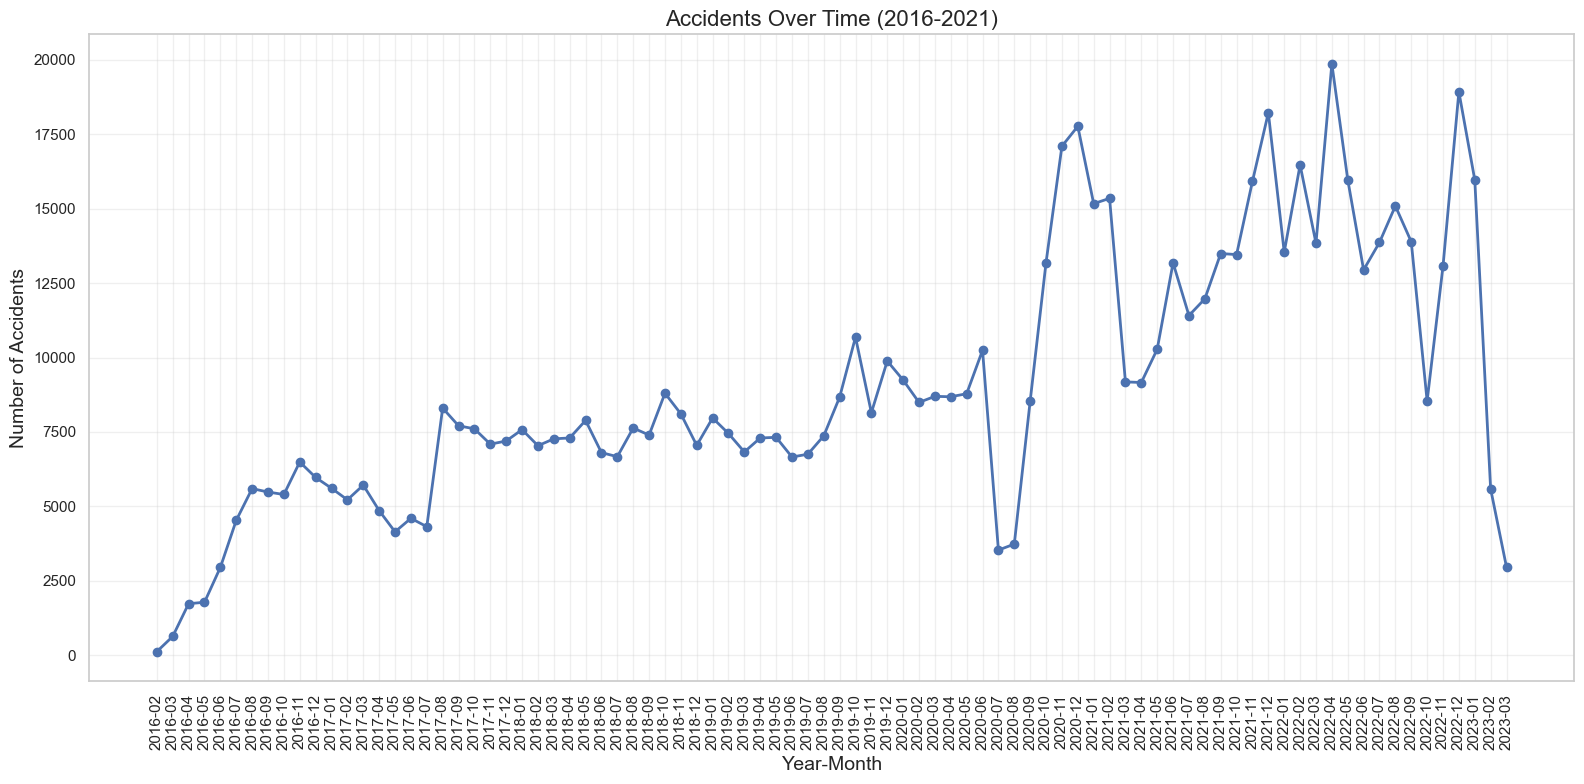

In [14]:
# Group time data by year and month
time_data['YearMonth'] = time_data['Year'].astype(str) + '-' + time_data['Month'].astype(str).str.zfill(2)
time_data = time_data.sort_values(['Year', 'Month'])

# Plot accidents over time as a line chart
plt.figure(figsize=(16, 8))
plt.plot(time_data['YearMonth'], time_data['Accident_Count'], marker='o', linestyle='-', linewidth=2)
plt.title('Accidents Over Time (2016-2021)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

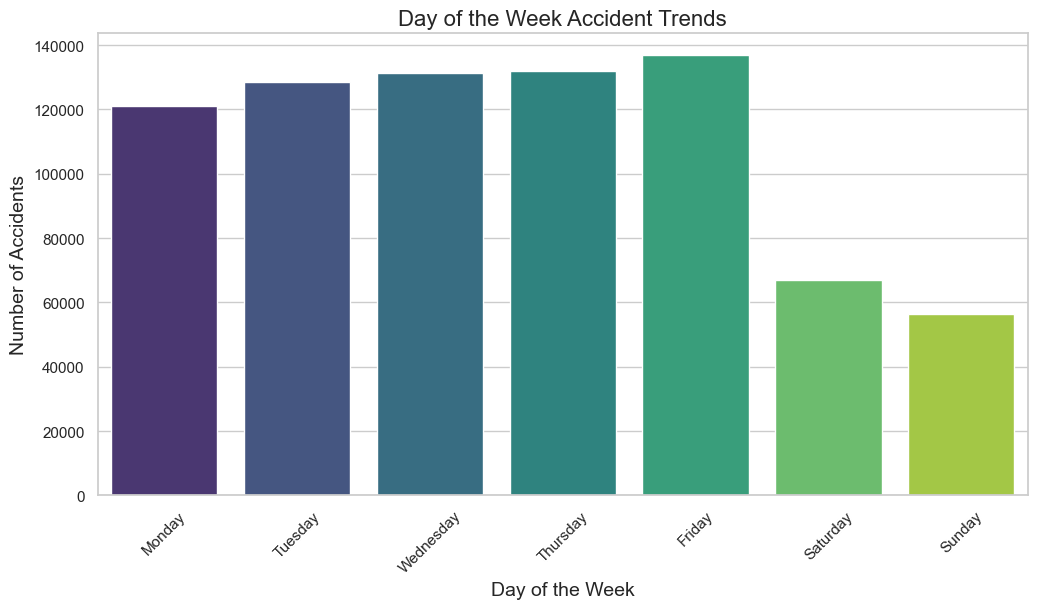

In [15]:
# Create a bar chart for accidents by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x="DayName", y="Accident_Count", data=weekday_data, palette="viridis")

# Titles and labels
plt.title("Day of the Week Accident Trends", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)

# Display the plot
plt.xticks(rotation=45)
plt.show()

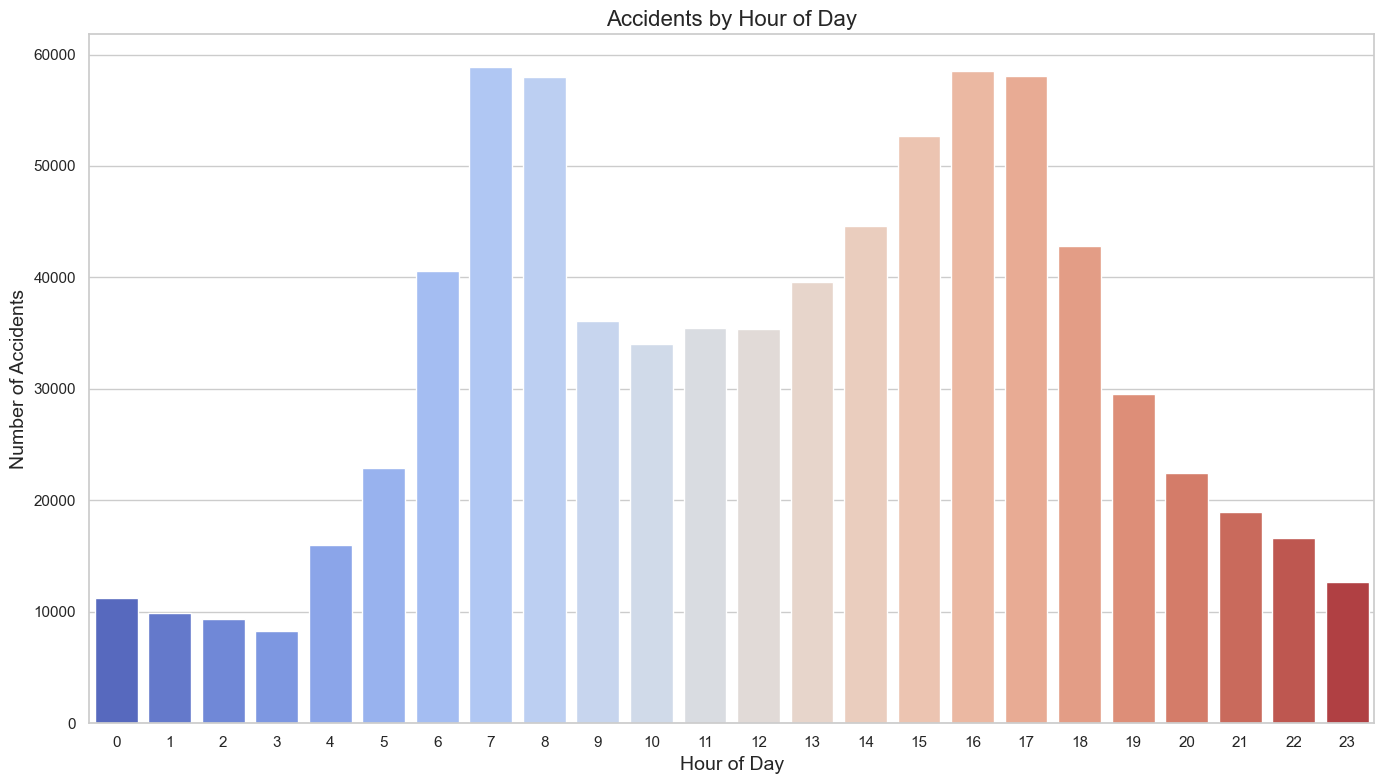

In [16]:
# Hourly distribution of accidents
plt.figure(figsize=(14, 8))

# Create bar chart
sns.barplot(x='Hour', y='Accident_Count', data=hour_data, palette='coolwarm')
plt.title('Accidents by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

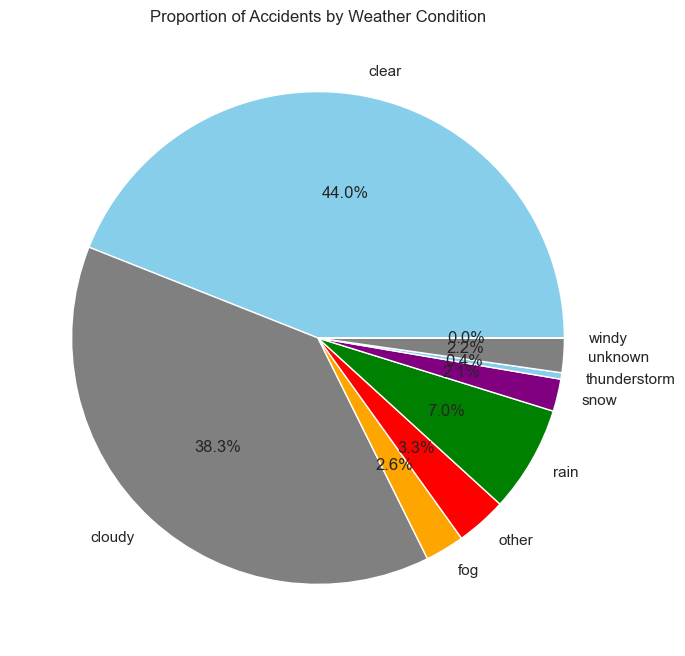

In [11]:
weather_df = pd.DataFrame(weather_data)
weather_df

plt.figure(figsize=(8, 8))
plt.pie(weather_df["Accident_Count"], labels=weather_df["Weather_Category"], autopct="%1.1f%%", colors=["skyblue", "gray", "orange", "red", "green", "purple"])
plt.title("Proportion of Accidents by Weather Condition")
plt.show()

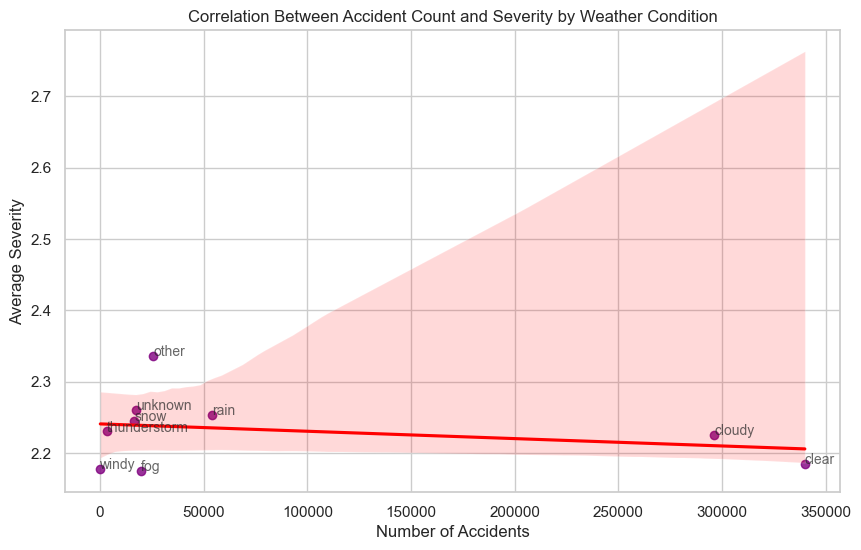

In [19]:
# Create a scatter plot with a trend line to show correlation
plt.figure(figsize=(10, 6))
sns.regplot(
    x=weather_df["Accident_Count"], 
    y=weather_df["Avg_Severity"], 
    scatter=True, 
    color="purple", 
    line_kws={"color": "red"}
)

# Add labels and title
plt.xlabel("Number of Accidents")
plt.ylabel("Average Severity")
plt.title("Correlation Between Accident Count and Severity by Weather Condition")

# Annotate weather categories
for i, txt in enumerate(weather_df["Weather_Category"]):
    plt.annotate(txt, (weather_df["Accident_Count"][i], weather_df["Avg_Severity"][i]), fontsize=10, alpha=0.7)

# Show the plot
plt.show()
